<h2> Transfer Learning - ResNet152V2 + ANN (1 hidden 128 nodes)</h2>
<hr>
<h4> Number of classes - 3 </h4>
<li>Early Blight</li>
<li>Late Blight</li>
<li>Healthy</li>
<hr>
<h4> Total images - 1561/class </h4>
<h4> Validation Split - 0.2</h4>
<h4> Accuracy - 97.5% </h4>
<h4> Epochs - 5 </h4>


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pickle
X = pickle.load(open('/content/drive/MyDrive/Dataset/Potato/Potato_X.pickle', 'rb'))
y = pickle.load(open('/content/drive/MyDrive/Dataset/Potato/Potato_y.pickle', 'rb'))

In [3]:
X.shape

(4682, 224, 224, 3)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
del X
del y

In [6]:
from keras.layers import Input, Lambda, Dense, Flatten, Dropout
from keras.models import Model
from keras.applications.resnet_v2 import ResNet152V2
from keras.applications.resnet_v2 import preprocess_input
from keras.preprocessing import image
from keras.models import Sequential
import numpy as np

<h3>ResNet152V2</h3>

In [7]:
resnet = ResNet152V2(input_shape=(224,224,3), weights='imagenet', include_top=False)

234545216/234545216 [==============================] - 2s 0us/step


In [ ]:
# y = y.reshape(4682, 1)

NameError: ignored

In [ ]:
# y.shape

In [8]:
for layer in resnet.layers:
  layer.trainable = False

In [9]:
x = Flatten()(resnet.output)

<h3>ANN</h3>

In [10]:
x = Dense(128, activation='relu', name='fcl')(x)

In [11]:
x = Dropout(0.3)(x)

In [12]:
prediction = Dense(3, activation='softmax', name='prediction')(x)

In [13]:
model = Model(inputs=resnet.input, outputs=prediction)

In [14]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [15]:
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [16]:
model.fit(X_train, y_train, batch_size=16, epochs=5)

Epoch 1/5
235/235 [==============================] - 49s 124ms/step - loss: 1.0297 - accuracy: 0.8475
Epoch 2/5
235/235 [==============================] - 29s 125ms/step - loss: 0.2487 - accuracy: 0.9170
Epoch 3/5
235/235 [==============================] - 30s 128ms/step - loss: 0.1441 - accuracy: 0.9493
Epoch 4/5
235/235 [==============================] - 30s 126ms/step - loss: 0.0820 - accuracy: 0.9658
Epoch 5/5
235/235 [==============================] - 30s 126ms/step - loss: 0.1021 - accuracy: 0.9634


In [17]:
del X_train
del y_train

In [18]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

30/30 [==============================] - 12s 249ms/step - loss: 0.1828 - accuracy: 0.9466
Test Loss: 0.18280437588691711
Test Accuracy: 0.9466382265090942


In [19]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Test set metrics
test_pred = model.predict(X_test)
test_pred = np.argmax(test_pred, axis=1)

test_precision = precision_score(y_test, test_pred, average='macro')
test_recall = recall_score(y_test, test_pred, average='macro')
test_f1_score = f1_score(y_test, test_pred, average='macro')

print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1 Score:", test_f1_score)


30/30 [==============================] - 9s 225ms/step
Test Precision: 0.9470350538542166
Test Recall: 0.9462225216989261
Test F1 Score: 0.9464094421144077


30/30 [==============================] - 7s 227ms/step


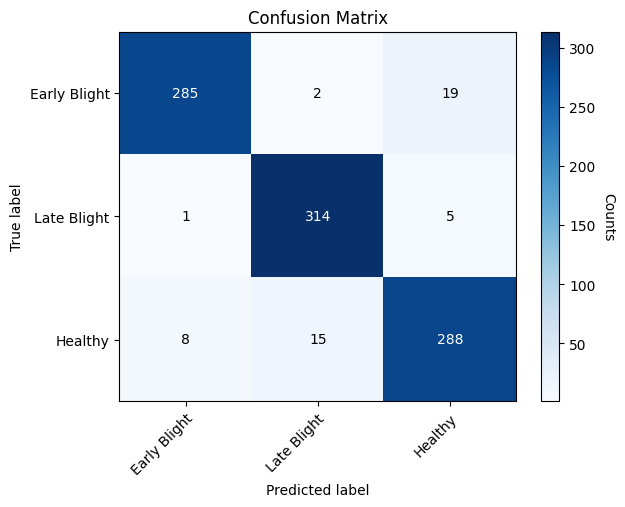

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Obtain predictions for the test set
test_pred = model.predict(X_test)
test_pred = np.argmax(test_pred, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, test_pred)

# Create figure and axis
fig, ax = plt.subplots()

# Plot the confusion matrix as an image
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Counts', rotation=-90, va="bottom")

# Set axis labels and title
class_names = ['Early Blight', 'Late Blight', 'Healthy']  # Replace with your class names
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=class_names, yticklabels=class_names,
       xlabel='Predicted label', ylabel='True label',
       title='Confusion Matrix',
       aspect='auto')

# Rotate tick labels
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > cm.max() / 2. else "black")

# Show the plot
plt.show()
